In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
concrete =  pd.read_excel('Concrete_Data.xls')

In [3]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
concrete.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [5]:
concrete.shape

(1030, 9)

In [6]:
concrete.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

In [7]:
concrete.duplicated().sum()

25

In [8]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFurnace      1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   courseAggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
concrete.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
concrete.head()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


EDA

In [12]:
corr = concrete.corr()
corr

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blastFurnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
courseAggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fineaggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

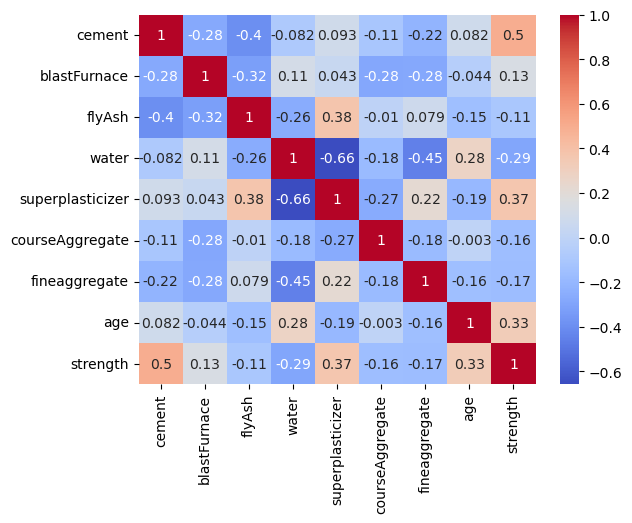

In [13]:
sns.heatmap(corr,annot=True, cbar = True, cmap = 'coolwarm')

In [14]:
X = concrete.drop("strength",axis=1)
y = concrete['strength']

In [15]:
X.shape

(1030, 8)

In [16]:
y.shape

(1030,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

C:\Users\user\AppData\Local\Temp\ipykernel_12224\3914126594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concrete['cement'])


<Axes: xlabel='cement', ylabel='Density'>

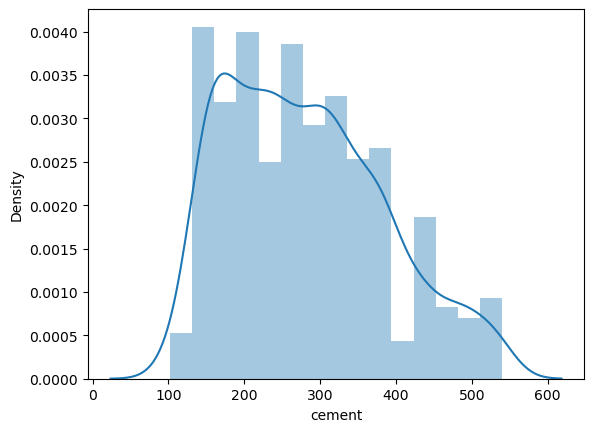

In [20]:
sns.distplot(concrete['cement'])

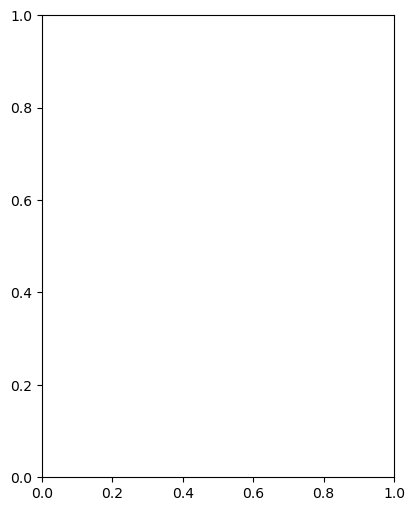

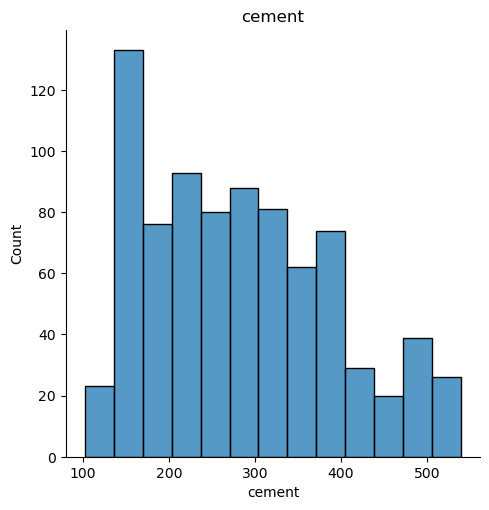

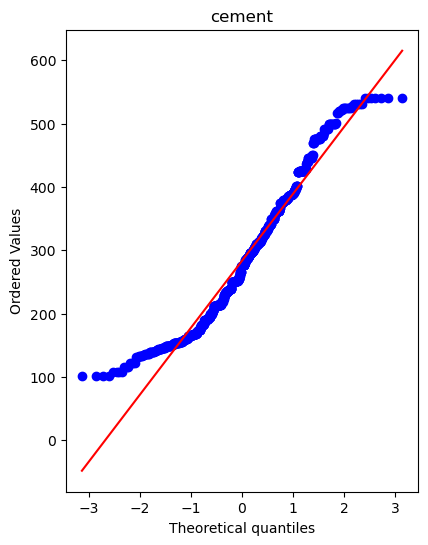

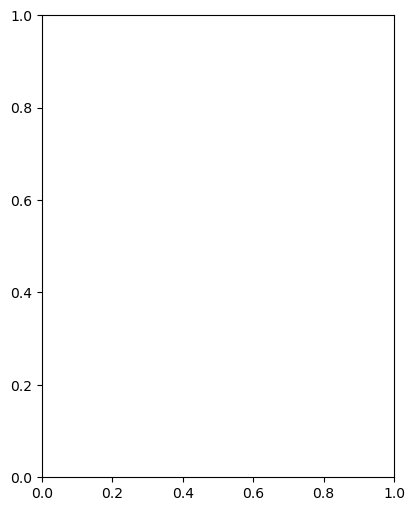

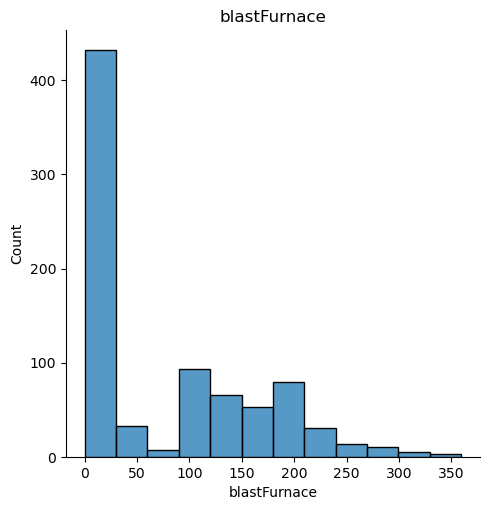

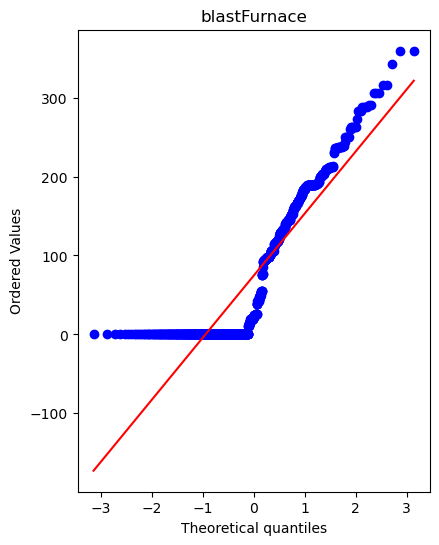

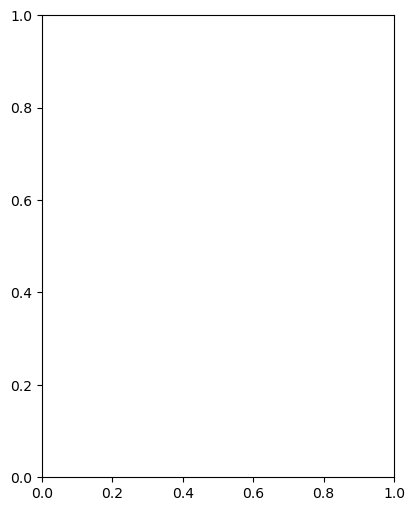

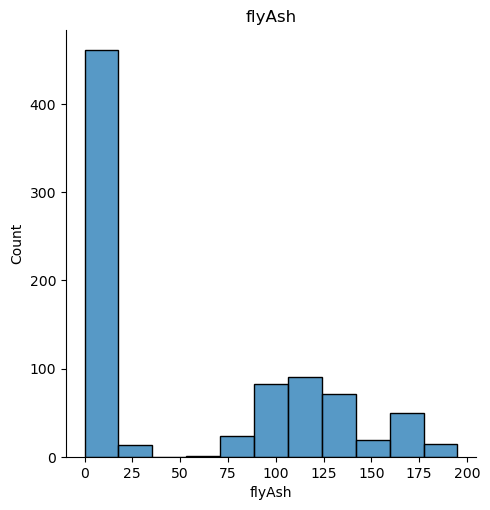

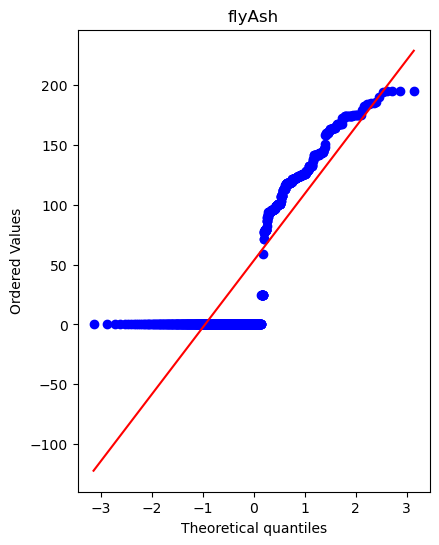

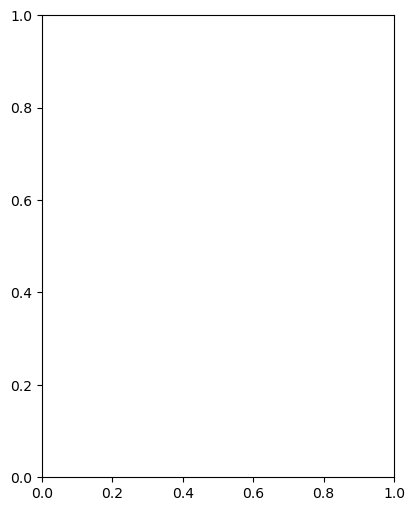

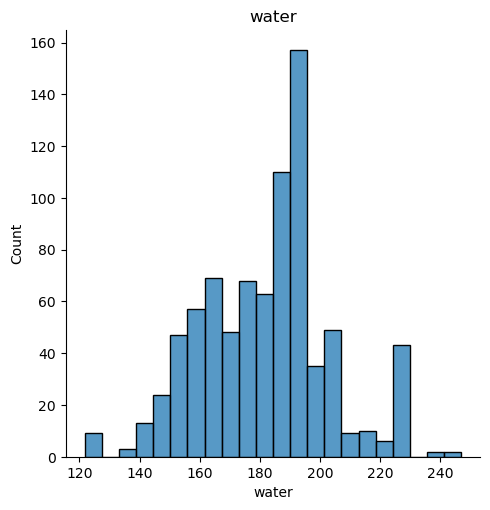

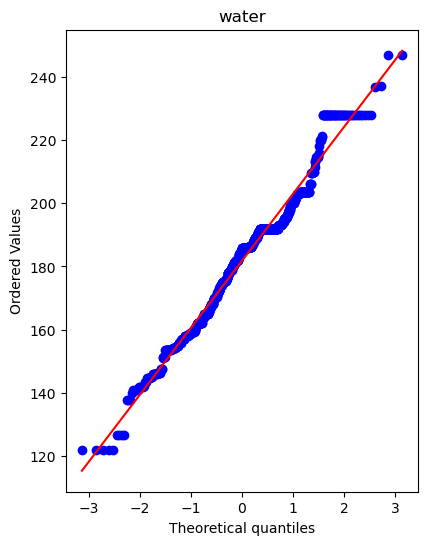

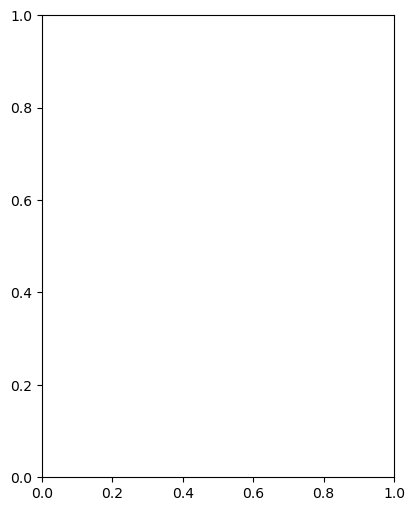

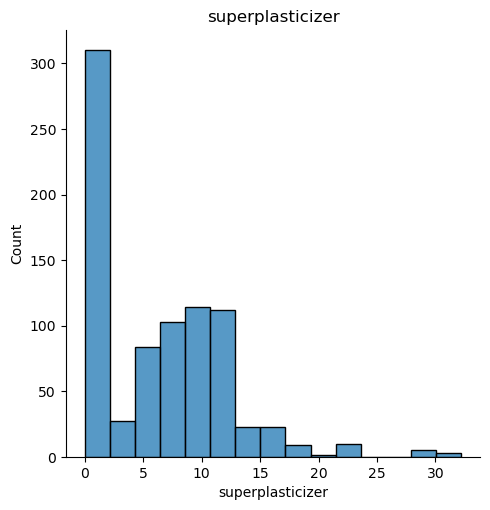

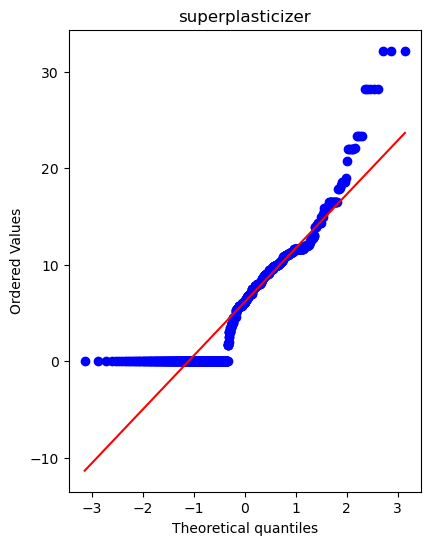

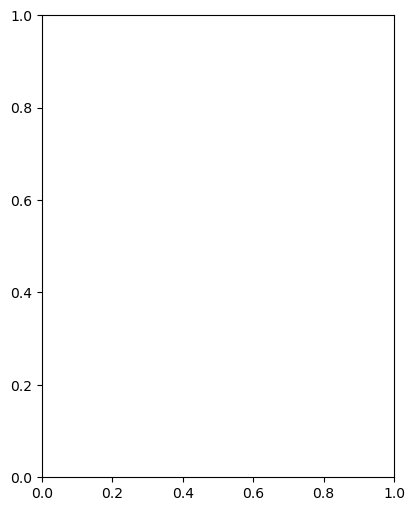

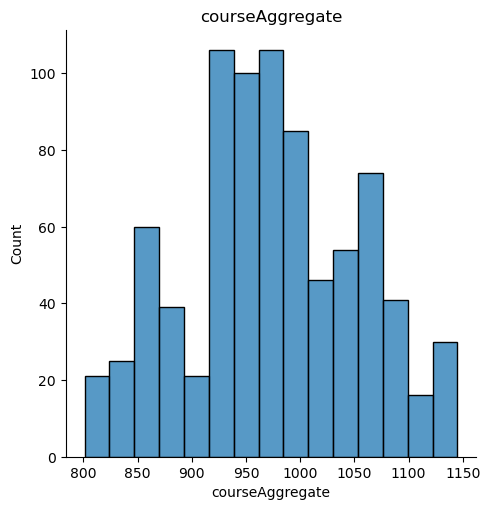

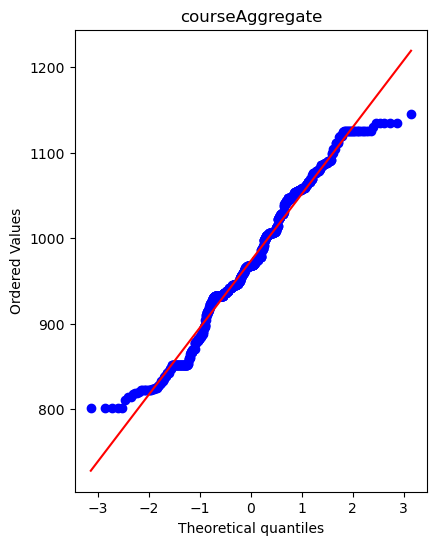

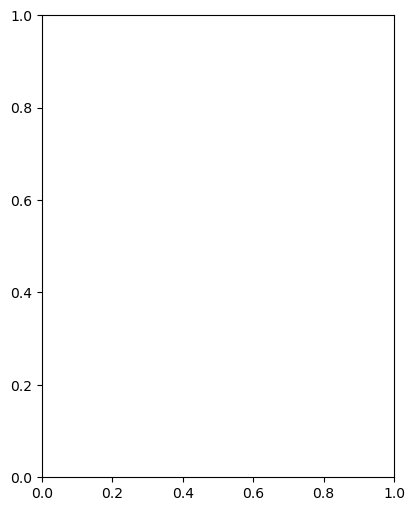

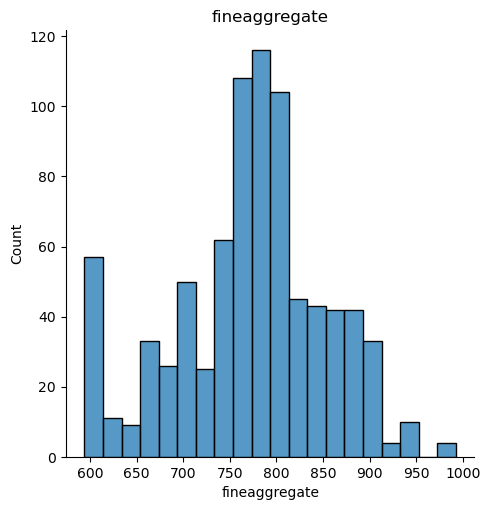

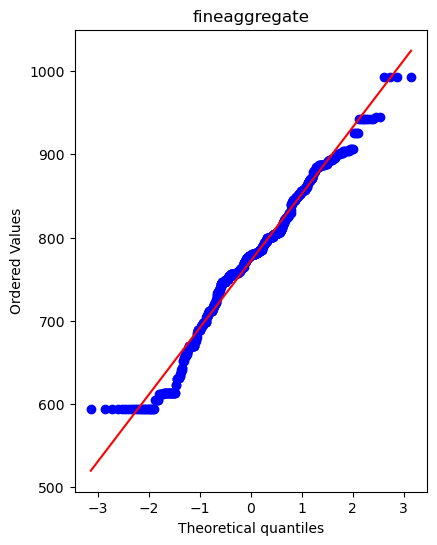

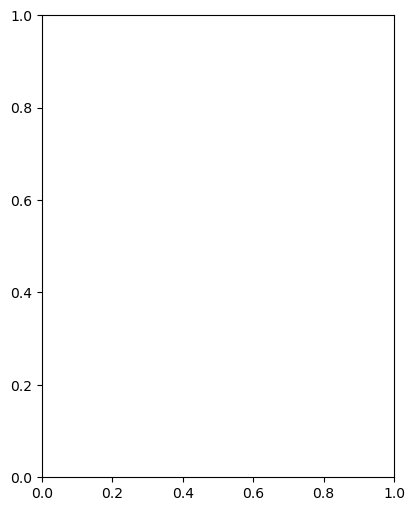

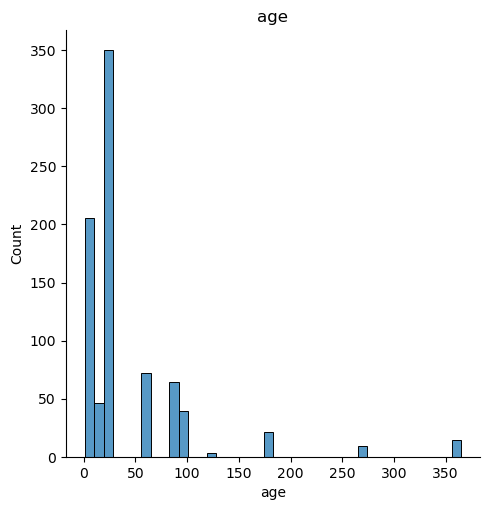

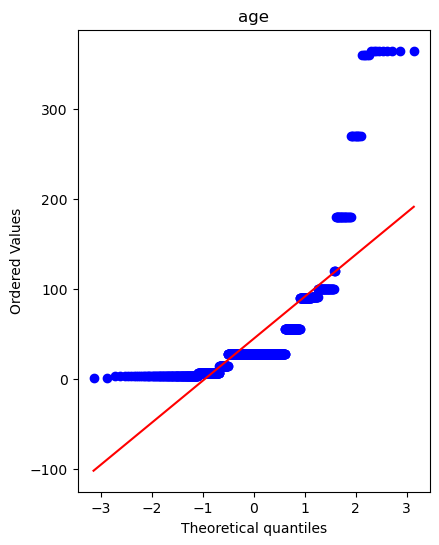

In [21]:
for col in X_train.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    sns.displot(X_train[col])
    plt.title(col)
    plt.figure(figsize=(10,6))
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

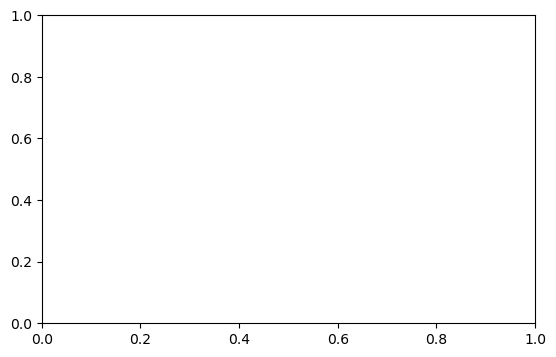

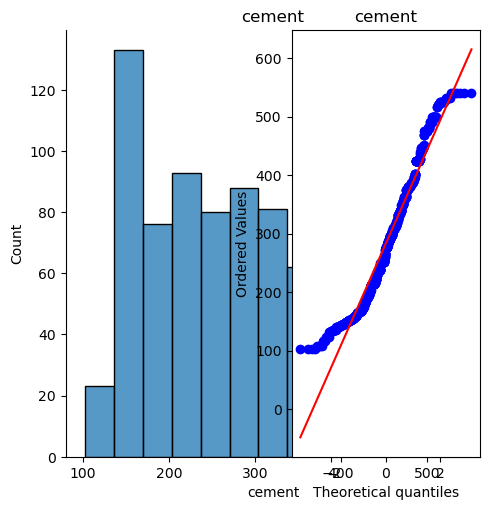

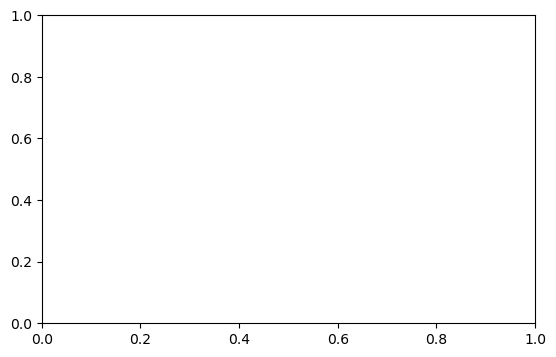

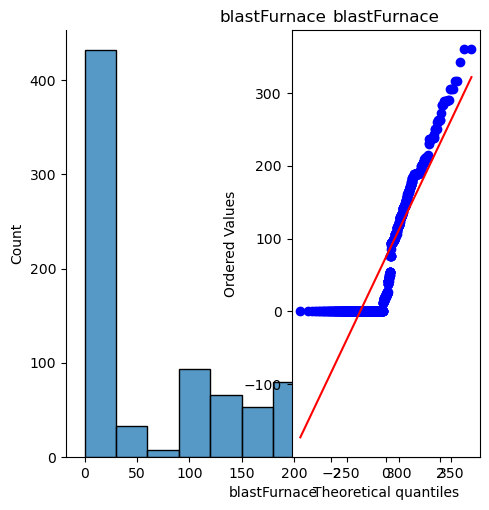

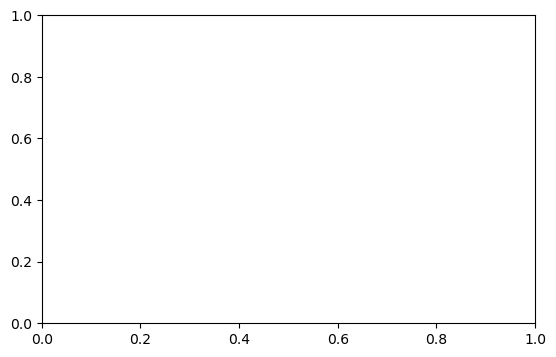

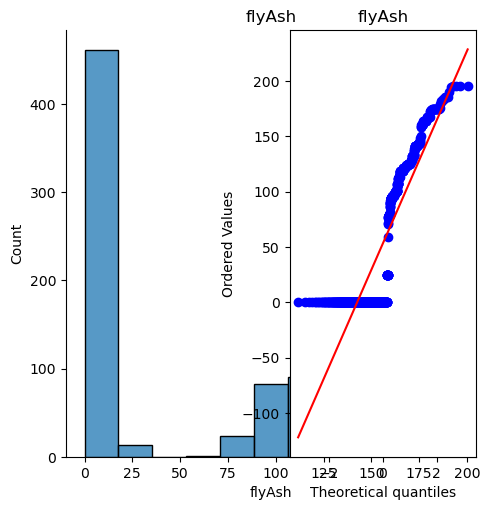

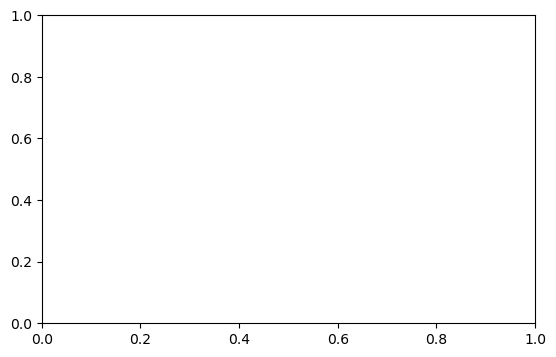

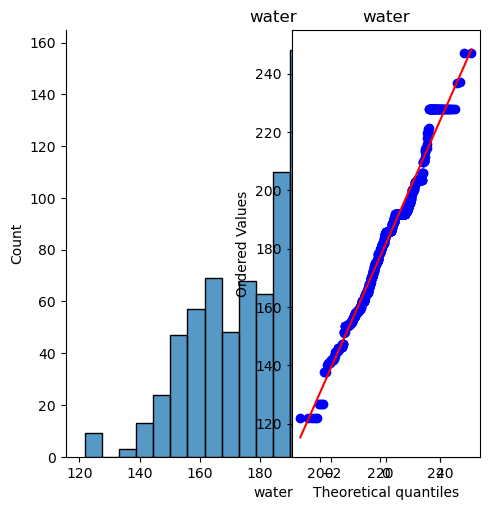

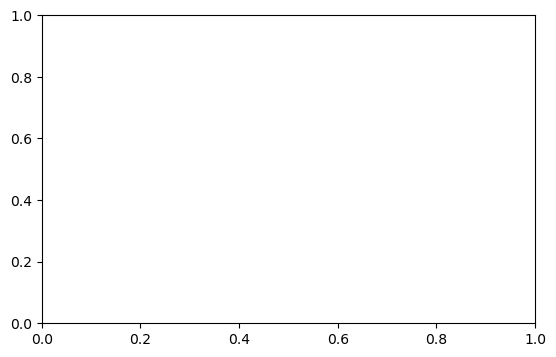

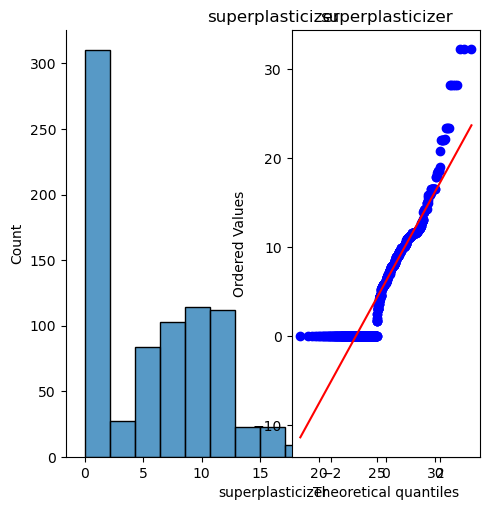

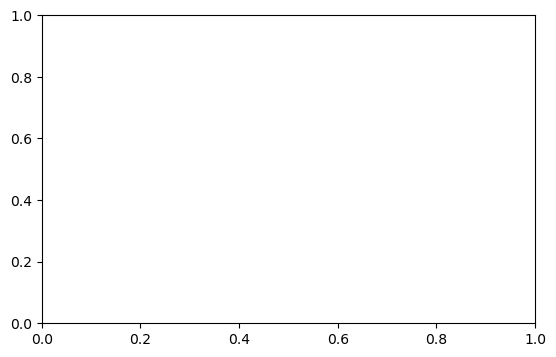

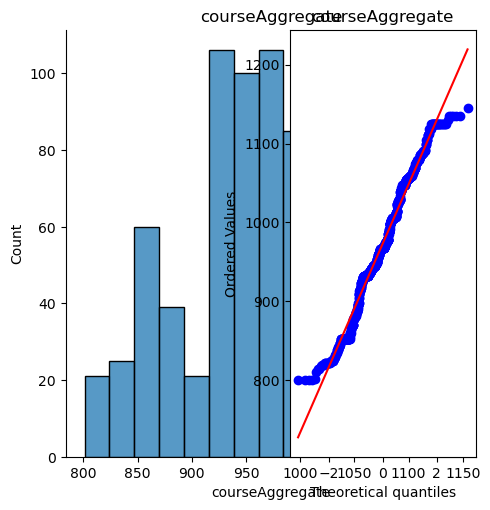

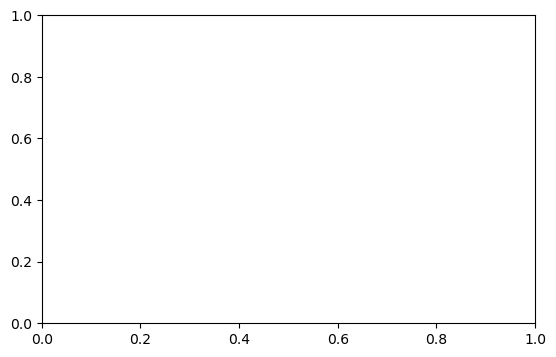

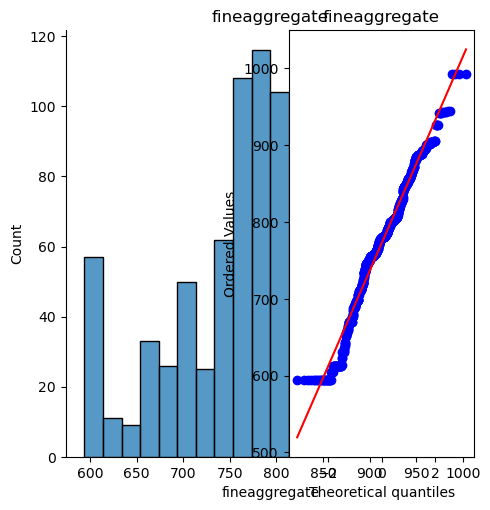

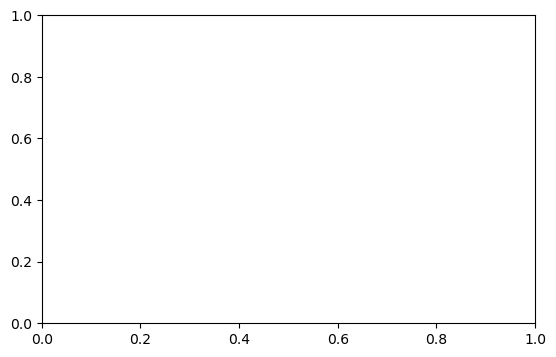

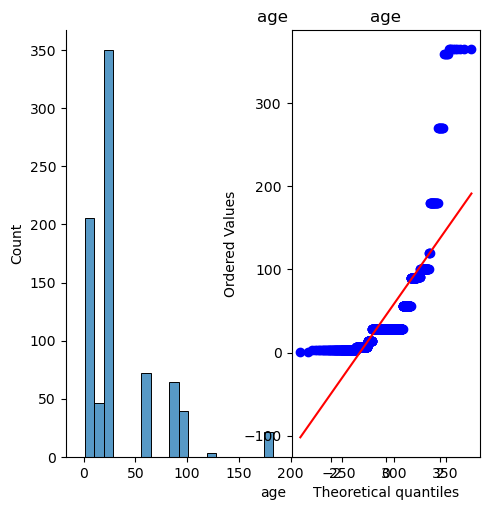

In [22]:
# input_features (input)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.displot(X_train[col])
    plt.title(col)
 
#     # QQ plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [24]:
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scalar = StandardScaler()

In [27]:
X_train_transformed =  scalar.fit_transform(X_train_transformed)
X_test_transformed = scalar.fit_transform(X_test_transformed)


In [28]:
X_test_transformed

array([[ 0.06062723,  0.91323205, -0.97700268, ..., -0.52588003,
        -1.39590298,  2.16842565],
       [ 1.00905758,  1.13347771, -0.97700268, ..., -0.35483506,
        -0.35657342, -1.02964822],
       [ 1.24058178,  1.13347771, -0.97700268, ..., -0.35483506,
        -0.35657342,  0.13392182],
       ...,
       [ 0.28007477,  1.16027928, -0.97700268, ...,  0.45780237,
         0.27658096, -1.02964822],
       [ 1.51253268,  0.2223136 ,  1.07320685, ..., -1.98806526,
        -0.43066778,  0.7080456 ],
       [ 0.79761085, -1.06005936, -0.97700268, ..., -0.03987895,
        -0.02819477,  1.09154197]])

Training Models

In [30]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
models = {
    "lr": LinearRegression(),
    "lss": Lasso(),
    "Ridg":Ridge(),
    "xgb": XGBRegressor()   
}

for name, md in models.items():
    md.fit(X_train_transformed,y_train)
    y_pred = md.predict(X_test_transformed)
    print(f"{name} : mse: {mean_squared_error(y_test,y_pred)},r2 score : {r2_score(y_test,y_pred)}")

lr : mse: 47.57238013319176,r2 score : 0.8153827256586501
lss : mse: 53.255812469536735,r2 score : 0.7933266548061552
Ridg : mse: 47.572812401214144,r2 score : 0.8153810481276151
xgb : mse: 47.743378588086735,r2 score : 0.8147191206725026


In [37]:
xgb = XGBRegressor()
xgb.fit(X_train_transformed,y_train)
y_pred = xgb.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8147191206725026

In [39]:
import pickle 
pickle.dump(xgb,open('model.pkl','wb'))

In [43]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)
    
    return prediction[0]

In [45]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [56.05373]
